In [20]:
import locale

In [21]:
locale.getpreferredencoding = lambda: "UTF-8"

In [22]:
!nvidia-smi

Wed Sep 25 10:18:53 2024       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.104.05             Driver Version: 535.104.05   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  Tesla T4                       Off | 00000000:00:04.0 Off |                    0 |
| N/A   57C    P0              29W /  70W |   3201MiB / 15360MiB |      0%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

In [ ]:
!pip install ultralytics

from IPython import display
display.clear_output()

import ultralytics
ultralytics.checks()

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
!ls


In [5]:
%cd /content/drive/MyDrive/CerviCure.v2i.yolov8
from ultralytics import YOLO

model = YOLO('yolov8m.pt')

layer_index = 0
for param in model.parameters():
    if layer_index == 1:
        param.requires_grad = True
    else:
        param.requires_grad = False
    layer_index += 1

for layer in model.model.children():
    for param in layer.parameters():
        param.requires_grad = True

model.train(
    data='data.yaml',
    epochs=20,
    batch=16,
    imgsz=640,
    optimizer='Adam',
    lr0=0.001,
    weight_decay=0.0005
)


results = model.val()
print(results)


/content/drive/MyDrive/CerviCure.v2i.yolov8
Ultralytics YOLOv8.2.100 🚀 Python-3.10.12 torch-2.4.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=detect, mode=train, model=yolov8m.pt, data=data.yaml, epochs=20, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train9, exist_ok=False, pretrained=True, optimizer=Adam, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_label

100%|██████████| 755k/755k [00:00<00:00, 89.8MB/s]


Overriding model.yaml nc=80 with nc=9

                   from  n    params  module                                       arguments                     
  0                  -1  1      1392  ultralytics.nn.modules.conv.Conv             [3, 48, 3, 2]                 
  1                  -1  1     41664  ultralytics.nn.modules.conv.Conv             [48, 96, 3, 2]                
  2                  -1  2    111360  ultralytics.nn.modules.block.C2f             [96, 96, 2, True]             
  3                  -1  1    166272  ultralytics.nn.modules.conv.Conv             [96, 192, 3, 2]               
  4                  -1  4    813312  ultralytics.nn.modules.block.C2f             [192, 192, 4, True]           
  5                  -1  1    664320  ultralytics.nn.modules.conv.Conv             [192, 384, 3, 2]              
  6                  -1  4   3248640  ultralytics.nn.modules.block.C2f             [384, 384, 4, True]           
  7                  -1  1   1991808  ultralytics

train: Scanning /content/drive/MyDrive/CerviCure.v2i.yolov8/train... 2923 images, 907 backgrounds, 0 corrupt: 100%|██████████| 3813/3813 [07:17<00:00,  8.72it/s]

train: WARNING ⚠️ /content/drive/MyDrive/CerviCure.v2i.yolov8/train/images/097_02_bmp.rf.5e19fa1f1b0e27b7fa4c651f1f0ee4c5.jpg: 1 duplicate labels removed
train: WARNING ⚠️ /content/drive/MyDrive/CerviCure.v2i.yolov8/train/images/259_01_bmp.rf.08b99bda38959dfb4a1902e2c29041b2.jpg: 1 duplicate labels removed


train: New cache created: /content/drive/MyDrive/CerviCure.v2i.yolov8/train.cache
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))


/usr/local/lib/python3.10/dist-packages/albumentations/__init__.py:13: UserWarning: A new version of Albumentations is available: 1.4.16 (you have 1.4.15). Upgrade using: pip install -U albumentations. To disable automatic update checks, set the environment variable NO_ALBUMENTATIONS_UPDATE to 1.
  check_for_updates()
val: Scanning /content/drive/MyDrive/CerviCure.v2i.yolov8/valid/labels.cache... 835 images, 4 backgrounds, 0 corrupt: 100%|██████████| 835/835 [00:00<?, ?it/s]

val: WARNING ⚠️ /content/drive/MyDrive/CerviCure.v2i.yolov8/valid/images/101_04_bmp.rf.235f6229fc65f2b2ed625672ef667f14.jpg: 1 duplicate labels removed


Plotting labels to runs/detect/train9/labels.jpg... 
optimizer: Adam(lr=0.001, momentum=0.937) with parameter groups 77 weight(decay=0.0), 84 weight(decay=0.0005), 83 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 640 train, 640 val
Using 8 dataloader workers
Logging results to runs/detect/train9
Starting training for 20 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/20      6.78G     0.7176      1.775      1.336          8        640: 100%|██████████| 239/239 [02:13<00:00,  1.79it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 27/27 [00:13<00:00,  2.06it/s]

                   all        835       1561      0.614      0.297      0.338      0.244



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/20      6.88G     0.7043      1.459      1.304         10        640: 100%|██████████| 239/239 [02:04<00:00,  1.93it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 27/27 [00:11<00:00,  2.30it/s]

                   all        835       1561      0.593      0.468      0.394      0.304



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/20      6.73G     0.6621      1.371      1.286          8        640: 100%|██████████| 239/239 [02:03<00:00,  1.94it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 27/27 [00:12<00:00,  2.24it/s]

                   all        835       1561      0.435      0.449      0.375      0.283



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/20      6.88G     0.6401      1.302      1.276         11        640: 100%|██████████| 239/239 [02:02<00:00,  1.95it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 27/27 [00:11<00:00,  2.30it/s]

                   all        835       1561      0.763      0.456      0.511      0.407



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/20      6.84G     0.6452      1.258      1.281         10        640: 100%|██████████| 239/239 [02:02<00:00,  1.95it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 27/27 [00:11<00:00,  2.33it/s]

                   all        835       1561      0.592      0.602       0.55      0.441



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/20      6.87G     0.6214      1.206       1.26          9        640: 100%|██████████| 239/239 [02:02<00:00,  1.95it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 27/27 [00:11<00:00,  2.35it/s]

                   all        835       1561      0.623       0.65      0.571      0.446



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/20      6.74G     0.5952      1.139      1.254         16        640: 100%|██████████| 239/239 [02:02<00:00,  1.95it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 27/27 [00:11<00:00,  2.36it/s]

                   all        835       1561      0.587      0.703      0.593      0.481



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/20      6.85G     0.6091      1.135      1.256          9        640: 100%|██████████| 239/239 [02:02<00:00,  1.95it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 27/27 [00:11<00:00,  2.33it/s]

                   all        835       1561      0.627      0.692      0.623      0.506



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/20      6.85G     0.6017      1.094      1.249         31        640: 100%|██████████| 239/239 [02:02<00:00,  1.95it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 27/27 [00:11<00:00,  2.32it/s]

                   all        835       1561      0.651      0.662      0.644      0.528



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/20      6.98G     0.5868      1.058      1.245         10        640: 100%|██████████| 239/239 [02:02<00:00,  1.95it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 27/27 [00:11<00:00,  2.35it/s]

                   all        835       1561      0.671      0.704       0.66       0.54


Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/20      6.74G     0.5085       1.07      1.301         24        640: 100%|██████████| 239/239 [02:02<00:00,  1.95it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 27/27 [00:11<00:00,  2.34it/s]

                   all        835       1561      0.623      0.656      0.609      0.485



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/20      6.84G     0.5142     0.9917      1.296          5        640: 100%|██████████| 239/239 [02:02<00:00,  1.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 27/27 [00:11<00:00,  2.35it/s]

                   all        835       1561      0.651      0.656      0.614      0.493



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/20      6.91G     0.5218     0.9693      1.301         18        640: 100%|██████████| 239/239 [02:02<00:00,  1.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 27/27 [00:11<00:00,  2.37it/s]

                   all        835       1561      0.645      0.674      0.626      0.497



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/20      6.86G     0.5012     0.9042      1.293          4        640: 100%|██████████| 239/239 [02:01<00:00,  1.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 27/27 [00:11<00:00,  2.35it/s]

                   all        835       1561      0.541      0.662      0.639      0.513



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/20      6.74G     0.5046     0.8989      1.286          6        640: 100%|██████████| 239/239 [02:01<00:00,  1.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 27/27 [00:11<00:00,  2.34it/s]

                   all        835       1561       0.61      0.729      0.687      0.553



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      16/20      6.84G     0.4918     0.8859      1.287          8        640: 100%|██████████| 239/239 [02:01<00:00,  1.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 27/27 [00:11<00:00,  2.35it/s]

                   all        835       1561      0.691        0.7      0.683      0.551



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      17/20      6.83G     0.4843     0.8328      1.268          5        640: 100%|██████████| 239/239 [02:01<00:00,  1.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 27/27 [00:11<00:00,  2.34it/s]

                   all        835       1561      0.714      0.689      0.673      0.548



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      18/20      6.86G     0.4818      0.794      1.256          5        640: 100%|██████████| 239/239 [02:01<00:00,  1.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 27/27 [00:11<00:00,  2.34it/s]

                   all        835       1561      0.746      0.674       0.71      0.581



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      19/20      6.74G     0.4747     0.7766      1.264          4        640: 100%|██████████| 239/239 [02:01<00:00,  1.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 27/27 [00:11<00:00,  2.34it/s]

                   all        835       1561      0.704      0.722      0.708      0.581



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      20/20      6.83G     0.4805      0.743      1.254          7        640: 100%|██████████| 239/239 [02:01<00:00,  1.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 27/27 [00:11<00:00,  2.35it/s]

                   all        835       1561      0.757      0.671      0.714      0.588



20 epochs completed in 0.758 hours.
Optimizer stripped from runs/detect/train9/weights/last.pt, 52.0MB
Optimizer stripped from runs/detect/train9/weights/best.pt, 52.0MB

Validating runs/detect/train9/weights/best.pt...
Ultralytics YOLOv8.2.100 🚀 Python-3.10.12 torch-2.4.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 218 layers, 25,844,971 parameters, 0 gradients, 78.7 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 27/27 [00:11<00:00,  2.29it/s]


                   all        835       1561       0.76      0.663      0.714      0.588
  Dyskeratosis in HSIL        140        141      0.834      0.858      0.926      0.804
   Dyskeratosis in SCC         22         22      0.432      0.545      0.452      0.372
 Intermediate Squamous         89        624      0.832      0.712       0.85      0.471
Koilocytosis in Cancer          5          5          1          0       0.16      0.136
           Metaplastic        159        174      0.858      0.845       0.91      0.746
     Mild Koilocytosis        113        118       0.75      0.703      0.792      0.718
             Parabasal        157        159      0.943      0.941      0.983      0.944
   Severe Koilocytosis         44         45      0.413      0.579      0.515      0.464
  Superficial Squamous        138        273      0.777      0.784      0.834      0.635
Speed: 0.2ms preprocess, 9.9ms inference, 0.0ms loss, 0.9ms postprocess per image
Results saved to runs/detect

val: Scanning /content/drive/MyDrive/CerviCure.v2i.yolov8/valid/labels.cache... 835 images, 4 backgrounds, 0 corrupt: 100%|██████████| 835/835 [00:00<?, ?it/s]

val: WARNING ⚠️ /content/drive/MyDrive/CerviCure.v2i.yolov8/valid/images/101_04_bmp.rf.235f6229fc65f2b2ed625672ef667f14.jpg: 1 duplicate labels removed



                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 53/53 [00:26<00:00,  2.03it/s]


                   all        835       1561      0.758      0.671      0.714      0.589
  Dyskeratosis in HSIL        140        141      0.832      0.858      0.925      0.804
   Dyskeratosis in SCC         22         22      0.426      0.545       0.45      0.371
 Intermediate Squamous         89        624      0.826      0.724      0.851      0.471
Koilocytosis in Cancer          5          5          1          0      0.161      0.137
           Metaplastic        159        174      0.857      0.845      0.909      0.748
     Mild Koilocytosis        113        118      0.747      0.712      0.791       0.72
             Parabasal        157        159      0.943      0.942      0.983      0.944
   Severe Koilocytosis         44         45      0.422      0.622      0.519      0.468
  Superficial Squamous        138        273      0.772      0.791      0.834      0.636
Speed: 0.2ms preprocess, 22.9ms inference, 0.0ms loss, 1.0ms postprocess per image
Results saved to runs/detec

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [12]:
%cd /content/drive/MyDrive/CerviCure.v2i.yolov8

/content/drive/MyDrive/CerviCure.v2i.yolov8


In [13]:
!yolo task=detect mode=predict model= /content/drive/MyDrive/CerviCure.v2i.yolov8/valid/images save=True

WARNING ⚠️ 'source' argument is missing. Using default 'source=/usr/local/lib/python3.10/dist-packages/ultralytics/assets'.
Ultralytics YOLOv8.2.100 🚀 Python-3.10.12 torch-2.4.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
Traceback (most recent call last):
  File "/usr/local/bin/yolo", line 8, in <module>
    sys.exit(entrypoint())
  File "/usr/local/lib/python3.10/dist-packages/ultralytics/cfg/__init__.py", line 831, in entrypoint
    getattr(model, mode)(**overrides)  # default args from model
  File "/usr/local/lib/python3.10/dist-packages/ultralytics/engine/model.py", line 548, in predict
    self.predictor.setup_model(model=self.model, verbose=is_cli)
  File "/usr/local/lib/python3.10/dist-packages/ultralytics/engine/predictor.py", line 303, in setup_model
    self.model = AutoBackend(
  File "/usr/local/lib/python3.10/dist-packages/torch/utils/_contextlib.py", line 116, in decorate_context
    return func(*args, **kwargs)
  File "/usr/local/lib/python3.10/dist-packages/ultralytics/nn/autob

In [14]:
import os

def generate_classes_code(data_yaml_path):
  """Generates Python code for classes based on the 'names' field in a YOLO data.yaml file.

  Args:
    data_yaml_path: Path to the data.yaml file.
  """

  with open(data_yaml_path, 'r') as f:
    data_yaml = f.read()

  lines = data_yaml.splitlines()
  for line in lines:
    if 'names:' in line:
      class_names_str = line.split(':')[1].strip()
      class_names = [name.strip().replace("'", "") for name in class_names_str.strip('[]').split(',')]

      class_code = ""
      for i, class_name in enumerate(class_names):
        class_code += f"class {class_name.replace(' ', '_')}(object):\n"
        class_code += f"  def __init__(self, id={i}):\n"
        class_code += f"    self.id = id\n"
        class_code += "\n"
      return class_code

data_yaml_path = '/content/drive/MyDrive/CerviCure.v2i.yolov8/data.yaml'
classes_code = generate_classes_code(data_yaml_path)
print(classes_code)



class Dyskeratosis_in_HSIL(object):
  def __init__(self, id=0):
    self.id = id

class Dyskeratosis_in_SCC(object):
  def __init__(self, id=1):
    self.id = id

class Intermediate_Squamous(object):
  def __init__(self, id=2):
    self.id = id

class Koilocytosis_in_Cancer(object):
  def __init__(self, id=3):
    self.id = id

class Metaplastic(object):
  def __init__(self, id=4):
    self.id = id

class Mild_Koilocytosis(object):
  def __init__(self, id=5):
    self.id = id

class Parabasal(object):
  def __init__(self, id=6):
    self.id = id

class Severe_Koilocytosis(object):
  def __init__(self, id=7):
    self.id = id

class Superficial_Squamous(object):
  def __init__(self, id=8):
    self.id = id




In [15]:
%cd /content/drive/MyDrive/CerviCure.v2i.yolov8/train
!yolo task=detect mode=predict model= /content/drive/MyDrive/CerviCure.v2i.yolov8/runs/detect/train8/weights/best.pt source= /content/drive/MyDrive/Cervix save=True


/content/drive/MyDrive/CerviCure.v2i.yolov8/train
Ultralytics YOLOv8.2.100 🚀 Python-3.10.12 torch-2.4.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 218 layers, 25,844,971 parameters, 0 gradients, 78.7 GFLOPs

image 1/35 /content/drive/MyDrive/Cervix/007_bmp.rf.8949a13696ca0b8ecdef1f05e0e825f6.jpg: 640x640 20 Intermediate Squamouss, 7 Superficial Squamouss, 37.1ms
image 2/35 /content/drive/MyDrive/Cervix/008_03_bmp.rf.4491e1963d93e8680232943d39e568dc.jpg: 640x640 1 Dyskeratosis in HSIL, 37.1ms
image 3/35 /content/drive/MyDrive/Cervix/008_06_bmp.rf.fce07f8f19ff45c4b166afffda12bd29.jpg: 640x640 1 Intermediate Squamous, 37.1ms
image 4/35 /content/drive/MyDrive/Cervix/008_07_bmp.rf.8ccf126790c75754ebfb781c92e76ea5.jpg: 640x640 1 Intermediate Squamous, 37.1ms
image 5/35 /content/drive/MyDrive/Cervix/008_09_bmp.rf.b374abf1738cd8ef33babd2957def359.jpg: 640x640 1 Superficial Squamous, 37.1ms
image 6/35 /content/drive/MyDrive/Cervix/009_03_bmp.rf.32df47e825ff17f01b71d1b907933fcb.jpg

Saving 010_03_bmp.rf.0f252b1d50e8df323bd4883cc38227b6.jpg to 010_03_bmp.rf.0f252b1d50e8df323bd4883cc38227b6 (1).jpg

image 1/1 /content/drive/MyDrive/CerviCure.v2i.yolov8/train/010_03_bmp.rf.0f252b1d50e8df323bd4883cc38227b6 (1).jpg: 640x640 1 Parabasal, 37.0ms
Speed: 3.2ms preprocess, 37.0ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 640)
Results saved to runs/detect/predict12


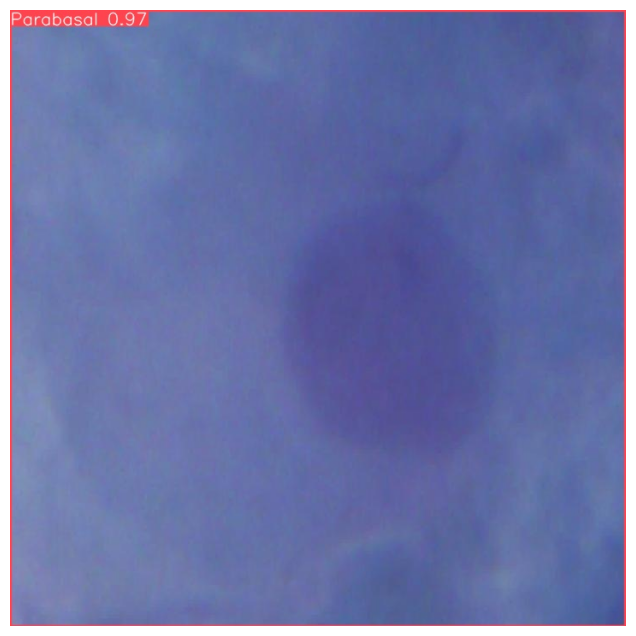

In [19]:
import cv2
import numpy as np
from google.colab import files
from ultralytics import YOLO
import matplotlib.pyplot as plt
import os
import glob

model = YOLO('/content/drive/MyDrive/CerviCure.v2i.yolov8/runs/detect/train8/weights/best.pt')

def predict_and_annotate(image_path):
    results = model.predict(source=image_path, save=True)
    save_dir = results[0].save_dir
    annotated_images = glob.glob(os.path.join(save_dir, '*.jpg'))
    if annotated_images:
        annotated_image_path = annotated_images[0]
        annotated_image = cv2.imread(annotated_image_path)
        return annotated_image
    return None

uploaded = files.upload()

for filename in uploaded.keys():
    annotated_image = predict_and_annotate(filename)
    if annotated_image is not None:
        plt.figure(figsize=(12, 8))
        plt.imshow(cv2.cvtColor(annotated_image, cv2.COLOR_BGR2RGB))
        plt.axis('off')
        plt.show()
    else:
        print(f"Failed to process image: {filename}")
